In [5]:
'''
Project3.ipynb

GROUP 10 of 12
Leslie Wollitz
Sofie Griffin

This project is meant to use the PCA machine learning algorithm to recognize decimal digits
from a 28x28 grayscale image. The training and testing data are sourced from Yann LeCun and
Corinna Cortes under the Creative Commons Attribution-Share Alike 3.0 license
https://creativecommons.org/licenses/by-sa/3.0/
'''

'\nProject3.ipynb\n\nGROUP 10 of 12\nLeslie Wollitz\nSofie Griffin\n\nThis project is meant to use the PCA machine learning algorithm to recognize decimal digits\nfrom a 28x28 grayscale image. The training and testing data are sourced from Yann LeCun and\nCorinna Cortes under the Creative Commons Attribution-Share Alike 3.0 license\nhttps://creativecommons.org/licenses/by-sa/3.0/\n'

In [6]:
# PCA
from sklearn import svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

from time import time
import matplotlib.pyplot as plt
from numpy import unique
from scipy.stats import loguniform
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [7]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

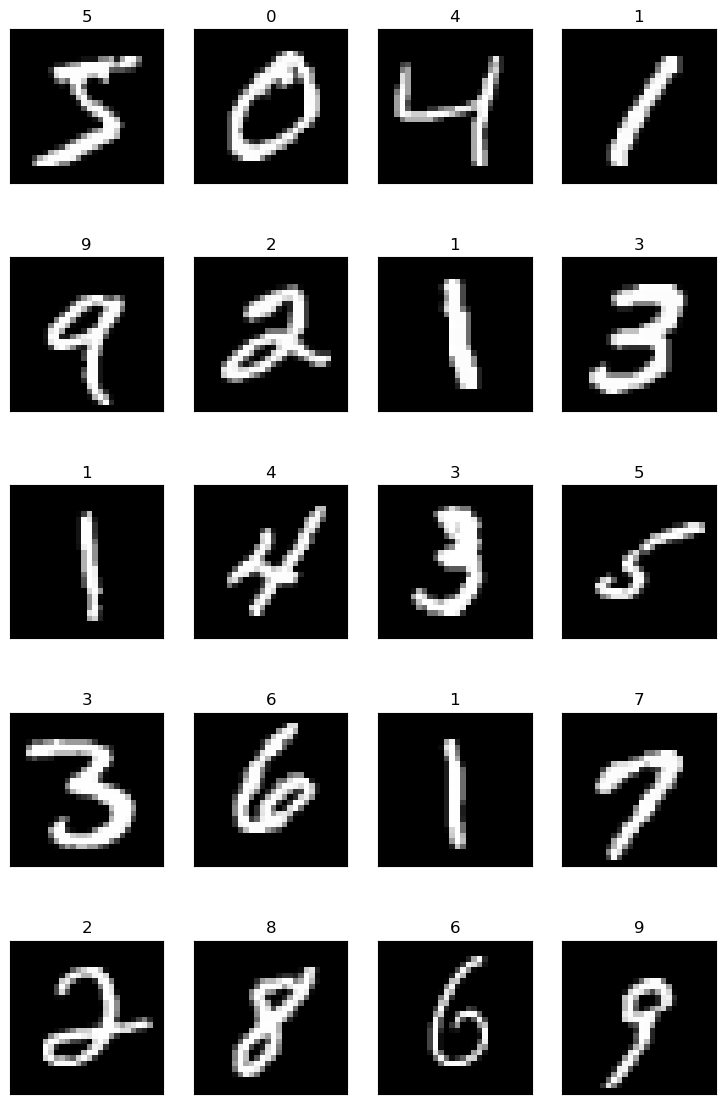

In [8]:
# Load data in from external file

from numpy import load

data = load('mnist.npz')
lst = data.files

# Subset for faster computation. Set as 60000 for full dataset
subset_size = 30000

OX_train = data["x_train"]
Oy_train = data["y_train"]
OX_test = data["x_test"]
Oy_test = data["y_test"]

X_train = OX_train[0:subset_size]
y_train = Oy_train[0:subset_size]
X_test = OX_test[0:subset_size]
y_test = Oy_test[0:subset_size]

# Reshape data to have only 1 dimension of features
X_train2 = np.reshape(X_train, [X_train.shape[0], 784])
X_test2 = np.reshape(X_test, [X_test.shape[0], 784])

# Plot sample of data with labels
plot_gallery(X_train2, y_train, 28, 28, 5, 4)

In [9]:
from time import time
from sklearn.decomposition import PCA

# Create eigenface data
n_components = 10

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train2.shape[1])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True)

pca.fit(X_train2)
print("done in %0.3fs" % (time() - t0))

h, w = 28, 28
eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train2)
X_test_pca = pca.transform(X_test2)
print("done in %0.3fs" % (time() - t0))

Extracting the top 10 eigenfaces from 784 faces
done in 1.067s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.247s


In [10]:
# Train the  model on train data
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
# Calculate best estimator based on the training data
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
    # In testing, found best estimator for full dataset to be SVC(C=38020.6991104755, class_weight='balanced', gamma=0.007318485099899978)
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
done in 1017.339s
Best estimator found by grid search:
SVC(C=2844.396946026852, class_weight='balanced', gamma=0.016366881040098535)


Predicting people's names on the test set
done in 6.804s
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.98      0.99      0.98      1135
           2       0.93      0.95      0.94      1032
           3       0.92      0.93      0.92      1010
           4       0.92      0.91      0.92       982
           5       0.93      0.93      0.93       892
           6       0.97      0.94      0.95       958
           7       0.94      0.94      0.94      1028
           8       0.92      0.90      0.91       974
           9       0.90      0.88      0.89      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



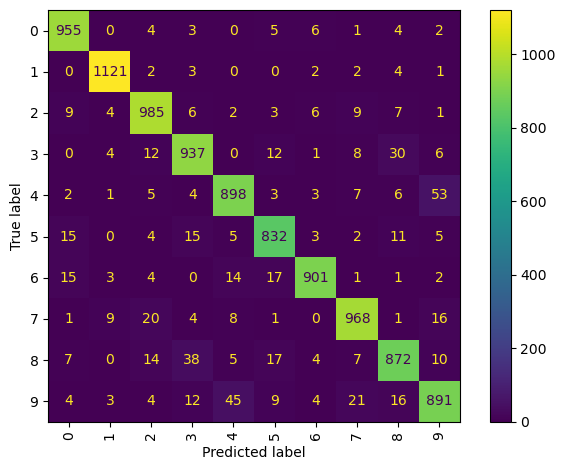

In [11]:
# Predicting labels for test data
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

# Create and display confusion matrix
target_names = np.unique(y_train)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(
    clf, X_test_pca, y_test, display_labels=target_names, xticks_rotation="vertical"
)
plt.tight_layout()
plt.show()

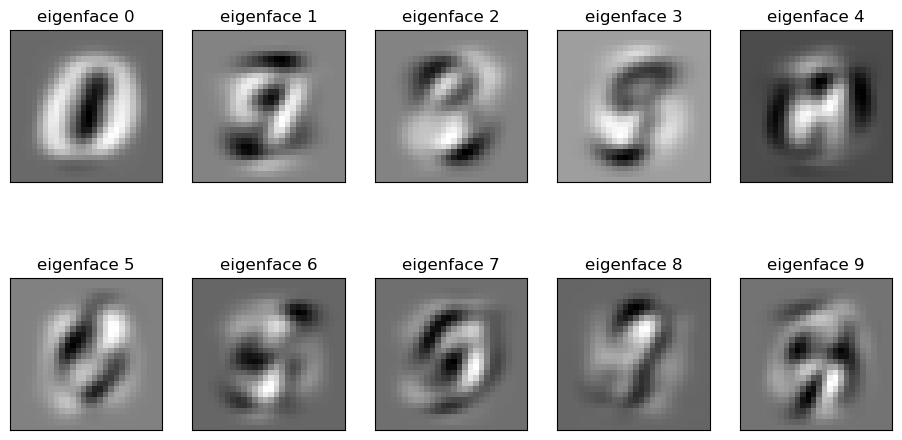

In [12]:
# Display eigenfaces for each label
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, 2, 5)
plt.show()

In [13]:
import ipywidgets as widgets
from ipycanvas import RoughCanvas
from ipycanvas import Canvas
from ipyevents import Event
import numpy as np
import math
import statistics
from PIL import Image, ImageFilter
import IPython.display as display

# Settings
BRUSH_RADIUS = 40
BRUSH_MIN = 20

# Create a canvas for drawing
drawing_canvas = RoughCanvas(width=280, height=280)
drawing_canvas.fill_style = 'black'
drawing_canvas.rough_fill_style = 'solid'
drawing_canvas.fill_rect(0, 0, drawing_canvas.width, drawing_canvas.height)
drawing_canvas.rough_fill_style = 'cross-hatch'
drawing_canvas.line_width = BRUSH_RADIUS
drawing_canvas.line_cap = 'round'
drawing_canvas.line_join = 'round'
drawing_canvas.sync_image_data = True

# Create a canvas for displaying the predicted number
number_canvas = Canvas(width=100, height=50)
number_canvas.fill_style = 'black'
number_canvas.fill_rect(0, 0, number_canvas.width, number_canvas.height)
number_canvas.font = '14px sans-serif'
number_canvas.fill_text('Predicted: ', 10, 30)

# Variables
prev_x = 0
prev_y = 0

# Define event handlers
def on_mouse_move(event):
    global prev_x, prev_y
    x, y = event['offsetX'], event['offsetY']
    drawing_canvas.stroke_style = 'white'
    if prev_x == 0:
        prev_x, prev_y = x, y
    else:
        dist = math.sqrt(math.pow(prev_x - x, 2) + math.pow(prev_y - y, 2))
        if dist < 2:
            dist = 2
        drawing_canvas.line_width = math.floor((BRUSH_RADIUS - BRUSH_MIN) / dist) + BRUSH_MIN
        drawing_canvas.stroke_line(prev_x, prev_y, x, y)
    #drawing_canvas.fill_style = 'white'
    #drawing_canvas.fill_arc(x, y, BRUSH_RADIUS, 0, 2 * 3.14159)
    prev_x, prev_y = x, y

def clear_canvas(button):
    global prev_x, prev_y
    drawing_canvas.fill_style = 'black'
    drawing_canvas.rough_fill_style = 'solid'
    drawing_canvas.fill_rect(0, 0, drawing_canvas.width, drawing_canvas.height)
    drawing_canvas.rough_fill_style = 'cross-hatch'
    # Reset drawing position
    prev_x = 0

def resizeAntiAlias(image_array, new_size):
    old_height, old_width = image_array.shape
    new_height, new_width = new_size

    # Calculate scale factors
    scale_y = old_height / new_height
    scale_x = old_width / new_width

    # Initialize resized image array
    resized_image_array = np.zeros(new_size, dtype=image_array.dtype)

    # Iterate over each pixel in the resized image
    for y in range(new_height):
        for x in range(new_width):
            # Calculate corresponding pixel coordinates in the original image
            src_y = y * scale_y
            src_x = x * scale_x

            # Calculate the surrounding pixel indices
            y0 = int(src_y)
            x0 = int(src_x)
            y1 = min(y0 + 1, old_height - 1)
            x1 = min(x0 + 1, old_width - 1)

            # Calculate interpolation weights
            weight_y = src_y - y0
            weight_x = src_x - x0

            # Perform bilinear interpolation with antialiasing
            top_left = image_array[y0, x0] * (1 - weight_y) * (1 - weight_x)
            top_right = image_array[y0, x1] * (1 - weight_y) * weight_x
            bottom_left = image_array[y1, x0] * weight_y * (1 - weight_x)
            bottom_right = image_array[y1, x1] * weight_y * weight_x
            resized_image_array[y, x] = top_left + top_right + bottom_left + bottom_right

    return resized_image_array

def export_image(button):
    # Convert canvas to numpy array
    image_data = drawing_canvas.get_image_data(0, 0, drawing_canvas.width, drawing_canvas.height)
    image_array = np.array(image_data[::1])  # No Vertical flip

    # Convert to grayscale
    if len(image_array.shape) == 3:  # Check if the image has color channels
        image_array = rgba_to_grayscale(image_array)

    # Resize to 28x28 with anti-aliasing
    demoArray = resizeAntiAlias(image_array, (28, 28))
    
    # Display the exported image
    print("Exported Image:")
    print(demoArray)
    
    demoArray = np.reshape(demoArray, [1, 784])
    demoArrayPCA = pca.transform(demoArray)
    yDemo = clf.predict(demoArrayPCA)
    
    # Display the predicted number
    number_canvas.clear()
    number_canvas.fill_style = 'black'
    number_canvas.fill_rect(0, 0, number_canvas.width, number_canvas.height)
    number_canvas.fill_style = 'white'
    number_canvas.fill_text('Predicted: ' + str(yDemo[0]), 10, 30)
    display.display(number_canvas)

def rgba_to_grayscale(image):
    # Extract the RGB channels
    rgb = image[:, :, :3]
    
    # Convert RGB to grayscale using luminance formula
    grayscale = np.dot(rgb[..., :3], [0.2989, 0.5870, 0.1140])
    
    return grayscale.astype(np.uint8)

# Setup event listeners
event = Event(source=drawing_canvas, watched_events=['mousemove'])
event.on_dom_event(on_mouse_move)

# Create buttons
clear_button = widgets.Button(description='Clear Canvas')
export_button = widgets.Button(description='Export Image')

# Add event handlers to buttons
clear_button.on_click(clear_canvas)
export_button.on_click(export_image)

# Display the canvases and buttons
widgets.HBox([drawing_canvas, widgets.VBox([clear_button, export_button, number_canvas])])
